<a href="https://colab.research.google.com/github/achrafbenabdalla/traitement-image/blob/dev/TP2_Filtrage_d%E2%80%99images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Partie I : filtrage passe-bas :



**1.   Bruitage d’une image**


*   Application un bruit de type «poivre-et-sel» («salt-and-pepper») sur l’image de
cameraman:














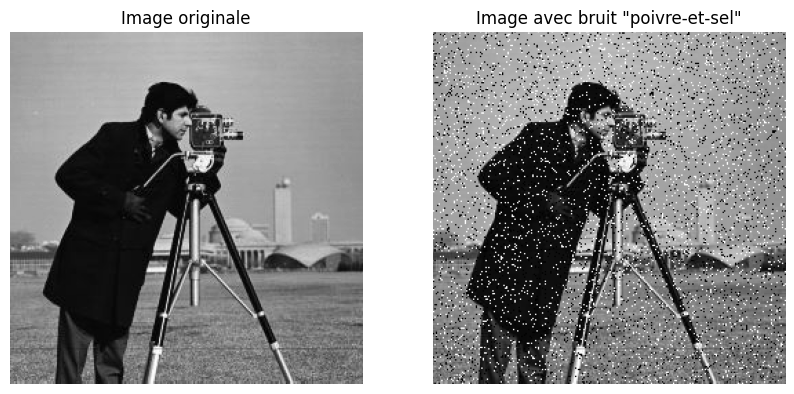

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io, color, util

# Charger l'image du cameraman depuis un autre emplacement
image_url = 'https://www.math.hkust.edu.hk/~masyleung/Teaching/CAS/MATLAB/image/images/cameraman.jpg'
cameraman = io.imread(image_url)

# Convertir l'image en niveaux de gris si elle est en couleur
if cameraman.shape[-1] == 3:
    cameraman = color.rgb2gray(cameraman)

# Appliquer le bruit «poivre-et-sel» avec 10% des pixels remplacés
noisy_cameraman = util.random_noise(cameraman, mode='s&p', amount=0.1)

# Afficher l'image originale et l'image avec le bruit
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cameraman, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_cameraman, cmap='gray')
plt.title('Image avec bruit "poivre-et-sel"')
plt.axis('off')

plt.show()




> conclusion :

Après l'ajout du bruit de type «poivre-et-sel» à une image, certains pixels de l'image sont aléatoirement remplacés par du noir (sel) ou du blanc (poivre). Ce processus simule visuellement une altération de l'image en introduisant des points noirs et blancs dispersés.

---


*   Appliquer un bruit de type «gaussien» sur l’image de cameraman en utilisant la
commande random_noise :









(-0.5, 255.5, 255.5, -0.5)

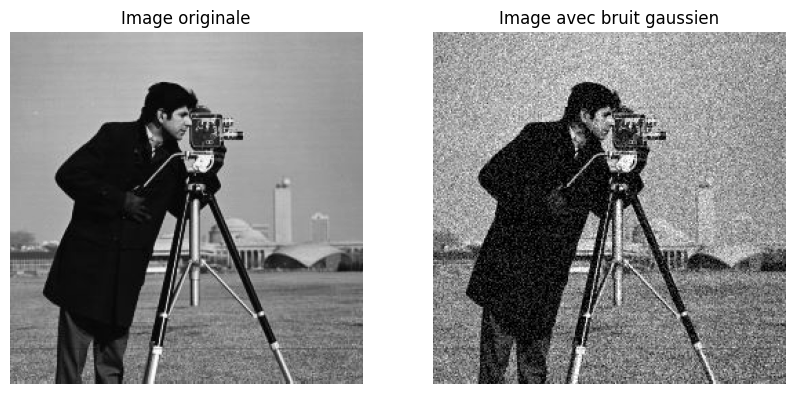

In [28]:
# Convertir l'image en niveaux de gris si elle est en couleur
if cameraman.shape[-1] == 3:
    cameraman = color.rgb2gray(cameraman)

# Appliquer le bruit gaussien
noisy_cameraman = util.random_noise(cameraman, mode='gaussian', var=0.01)

# Afficher l'image originale et l'image avec le bruit
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cameraman, cmap='gray')
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_cameraman, cmap='gray')
plt.title('Image avec bruit gaussien')
plt.axis('off')



> conclusion:

On peut créer du bruit gaussien en ajoutant à chaque pixel de l'image une valeur provenant d'une distribution gaussienne. La distribution gaussienne est caractérisée par sa moyenne (qui peut être nulle) et sa variance

---

**2.   Filtrage moyenneur**


> a.   Principe :

Le filtre moyenneur est un filtre passe-bas. En l'appliquant sur l'image, celle-ci devient floue
et plus particulièrement les contours. Ce filtre sert à éliminer les dégradations locales de faibles
dimensions. Son principe est de remplacer chaque pixel par la moyenne des valeurs des pixels
adjacentes et du pixel central. Il pourrait y avoir plusieurs tailles de masque 3×3, 5×5 et 7×7 qui
définissent des filtres moyenneurs différents.


> b. Questions:














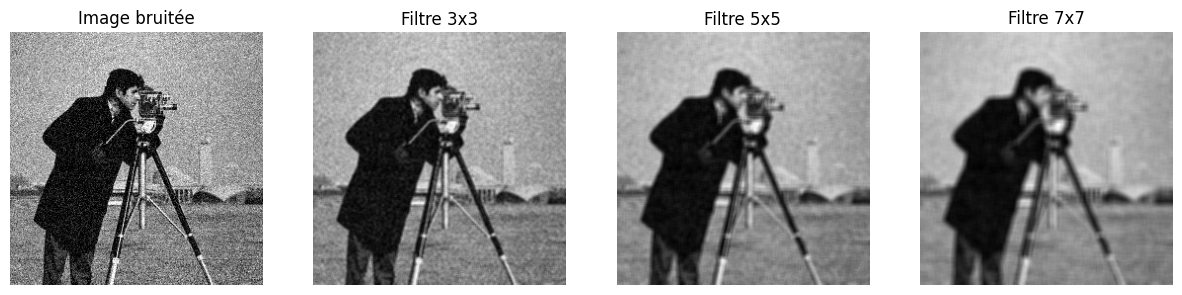

In [33]:


# Définir des noyaux de dimension 3x3, 5x5 et 7x7 pour le filtre moyenneur
kernel_3x3 = np.ones((3, 3)) / 9.0
kernel_5x5 = np.ones((5, 5)) / 25.0
kernel_7x7 = np.ones((7, 7)) / 49.0

# Appliquer le filtre moyenneur avec ndimage.convolve
smoothed_3x3 = ndimage.convolve(noisy_cameraman, kernel_3x3)
smoothed_5x5 = ndimage.convolve(noisy_cameraman, kernel_5x5)
smoothed_7x7 = ndimage.convolve(noisy_cameraman, kernel_7x7)

# Afficher les résultats
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(noisy_cameraman, cmap='gray')
plt.title('Image bruitée')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(smoothed_3x3, cmap='gray')
plt.title('Filtre 3x3')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(smoothed_5x5, cmap='gray')
plt.title('Filtre 5x5')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(smoothed_7x7, cmap='gray')
plt.title('Filtre 7x7')
plt.axis('off')

plt.show()



> conclusion :



> Filtre 3x3 :



Lissage modéré : Le filtre 3x3 moyenne les pixels dans un voisinage restreint.
Certains détails sont préservés, mais le bruit est partiellement atténué.
Les contours sont légèrement adoucis, mais l'image conserve une certaine netteté.



> Filtre 5x5 :



Lissage plus prononcé : Le filtre 5x5 a un effet de lissage plus important.
Les détails sont davantage atténués, ce qui peut donner une apparence plus floue.
Le bruit est réduit de manière significative, mais des contours fins peuvent être sacrifié.



> Filtre 7x7 :



Lissage important : Le filtre 7x7 engendre un lissage plus agressif.
La plupart des détails sont atténués, conduisant à une image plus lisse.
Le bruit est fortement réduit, mais des structures fines peuvent être perdues.
En résumé, l'effet du filtre moyenneur dépend de la taille du noyau utilisé. Les noyaux plus grands ont un effet de lissage plus prononcé, ce qui réduit le bruit mais peut également entraîner la perte de détails fins



**3. Filtrage médian**



> a. Principe:

Le filtre médian est un filtre non linéaire. Il permet d'atténuer certains types de bruits en
dégradant très peu les contours. Il est efficace pour éliminer les bruits qui affectent
seulement un petit nombre de pixels. Son principe est d'affecter à un pixel la valeur
médiane des intensités dans son voisinage.


> b. Questions:








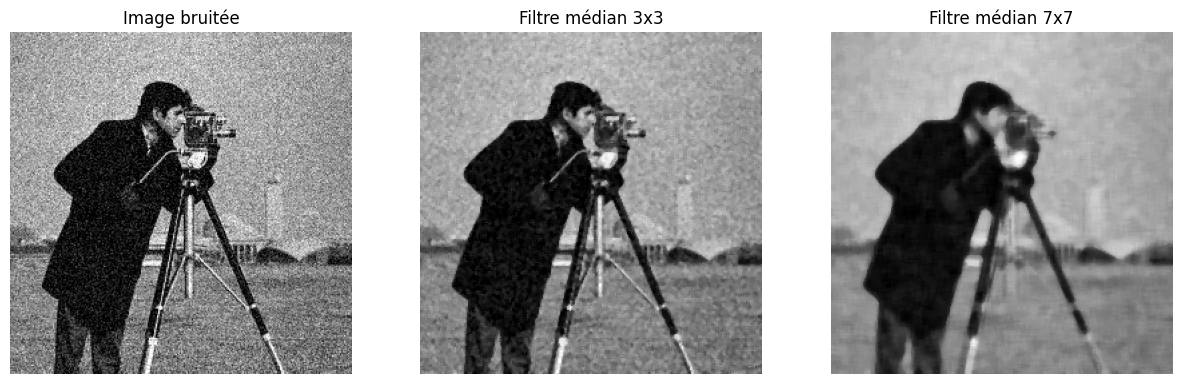

In [30]:
# Appliquer le filtre médian de taille 3x3
median_3x3 = ndimage.median_filter(noisy_cameraman, size=3)

# Appliquer le filtre médian de taille 7x7
median_7x7 = ndimage.median_filter(noisy_cameraman, size=7)

# Afficher les résultats du filtre médian
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(noisy_cameraman, cmap='gray')
plt.title('Image bruitée')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(median_3x3, cmap='gray')
plt.title('Filtre médian 3x3')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_7x7, cmap='gray')
plt.title('Filtre médian 7x7')
plt.axis('off')

plt.show()



> Filtre médian 3x3 :



Atténuation du bruit : Le filtre médian élimine les valeurs aberrantes en remplaçant chaque pixel par la valeur médiane de son voisinage 3x3.
Les contours et les détails sont préservés, mais le bruit est significativement réduit.


> Filtre médian 7x7 :



Atténuation plus prononcée du bruit : Avec un noyau plus grand, le filtre médian 7x7 réduit encore plus le bruit.
Des détails plus fins peuvent être légèrement affectés, mais la réduction du bruit est plus importante.




> En comparaison avec le filtre moyenneur, le filtre médian est souvent plus efficace pour atténuer le bruit tout en préservant les détails. Il est particulièrement robuste face aux valeurs aberrantes, car il n'est pas sensible aux valeurs extrêmes dans le voisinage.




 **4.   Filtrage gaussian :**



> a. Principe:

Le filtre gaussien est un filtre passe-bas dont la réponse impulsionnelle est une fonction
gaussienne. Mathématiquement, ce filtre modifie le signal entrant par une convolution avec
une fonction gaussienne. Comme pour le filtre moyenneur, nous distinguons entre le filtre
gaussien 3 x 3 et le filtre gaussien 5 x 5...


> b. Questions:








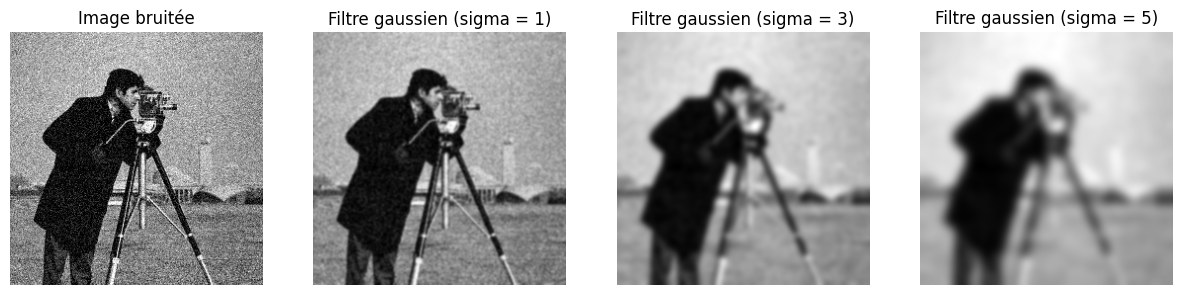

In [34]:
from scipy.ndimage import gaussian_filter

# Appliquer le filtre gaussien avec différents sigmas
gaussian_sigma_1 = gaussian_filter(noisy_cameraman, sigma=1)
gaussian_sigma_3 = gaussian_filter(noisy_cameraman, sigma=3)
gaussian_sigma_5 = gaussian_filter(noisy_cameraman, sigma=5)

# Afficher les résultats du filtre gaussien
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(noisy_cameraman, cmap='gray')
plt.title('Image bruitée')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gaussian_sigma_1, cmap='gray')
plt.title('Filtre gaussien (sigma = 1)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gaussian_sigma_3, cmap='gray')
plt.title('Filtre gaussien (sigma = 3)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gaussian_sigma_5, cmap='gray')
plt.title('Filtre gaussien (sigma = 5)')
plt.axis('off')

plt.show()



> conclusion :






> Filtre gaussien (sigma = 1) :

Effet de lissage léger : Le filtre gaussien avec un faible sigma lisse l'image tout en préservant les contours.
Réduction modérée du bruit.


> Filtre gaussien (sigma = 3) :



Lissage plus prononcé : Un sigma plus élevé entraîne un lissage plus important de l'image.
Réduction significative du bruit, mais certains détails fins peuvent être affectés.



> Filtre gaussien (sigma = 5) :



Lissage prononcé : Un sigma plus élevé induit un lissage plus agressif.
Réduction importante du bruit, mais peut entraîner la perte de détails fins.




> En général, le filtre gaussien est efficace pour réduire le bruit tout en préservant les contours de l'image


---


# Partie II : Filtrage passe-haut





>a. Principe:

Un filtre passe-haut réalise l'opération complémentaire de celle obtenue avec les filtres
passe-bas.
Il permet alors d'atténuer les basses fréquences et faire passer les hautes fréquences. Son
utilisation principale est la détection de contours.


> b. Filtrage par convolution:




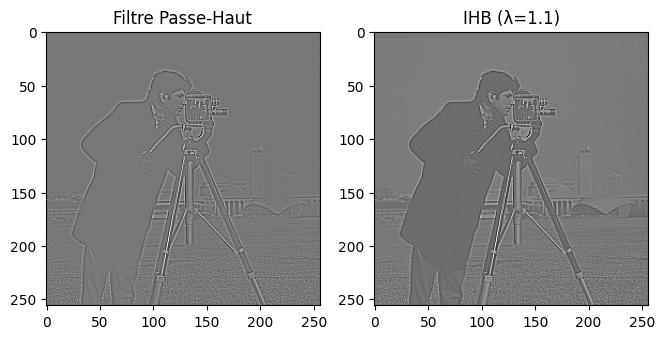

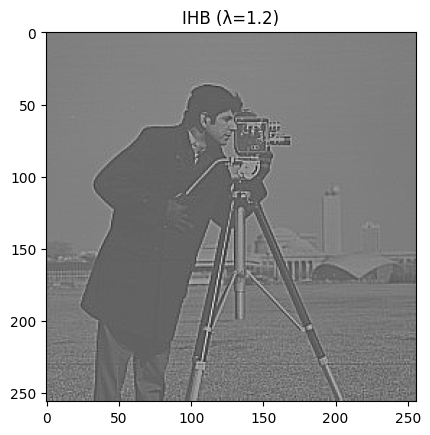

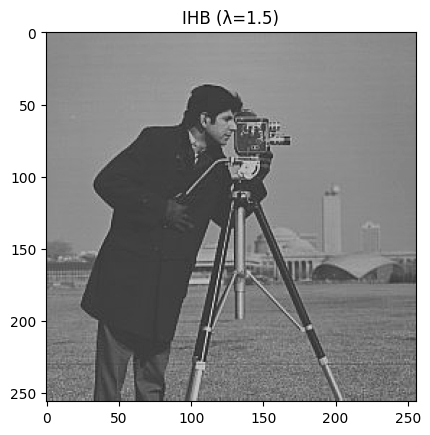

In [49]:
from scipy.signal import convolve2d
# Définir le noyau du filtre passe-haut
kernel_passe_haut = np.array([[-1, -1, -1],
                              [-1,  8, -1],
                              [-1, -1, -1]]) / 9

# Définir le noyau du filtre passe-bas (moyenne 3x3)
kernel_passe_bas = np.ones((3, 3)) / 9

# Application de  filtre passe-haut
image_filtre_passe_haut = convolve2d(cameraman, kernel_passe_haut, mode='same', boundary='symm')

#  Application de  filtre (moyenne 3x3)
image_filtre_passe_bas = convolve2d(cameraman, kernel_passe_bas, mode='same', boundary='symm')

# Comparer les images passe-haut et passe-bas
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_filtre_passe_haut, cmap='gray')
plt.title('Filtre Passe-Haut')

plt.subplot(1, 3, 2)
plt.imshow(image_filtre_passe_bas, cmap='gray')
plt.title('Filtre Passe-Bas (Moyenne 3x3)')

# Calculer et comparer IPH avec IHB pour différentes valeurs de lambda
lambda_values = [1.1, 1.2, 1.5]

for lambda_val in lambda_values:
    # Calculer IHB
    image_ihb = (lambda_val - 1) * image_filtre_passe_bas + image_filtre_passe_haut

    # Afficher le résultat
    plt.imshow(image_ihb, cmap='gray')
    plt.title(f'IHB (λ={lambda_val})')
    plt.show()



> conclusion :


> Filtre Passe-Haut :


 L'image résultante du filtre passe-haut met en évidence les contours et les détails saillants de l'image du cameraman. Ce filtre amplifie les variations d'intensité, soulignant les transitions brusques entre les pixels.


> Filtre Passe-Bas (Moyenne 3x3) :


 Le filtre passe-bas avec noyau de moyenne 3x3 produit une image lissée où les détails fins sont atténués. Les variations d'intensité sont moyennées sur un voisinage, conduisant à une perte de certains détails, mais également à la réduction du bruit.


> Image Combinée (IHB) :


En combinant l'image filtrée par le passe-bas et celle par le passe-haut avec différentes valeurs de lambda, nous observons une transition entre les caractéristiques des deux filtres. Une valeur de lambda plus faible favorise les caractéristiques du filtre passe-haut, tandis qu'une valeur plus élevée favorise le passe-bas. Cela permet un contrôle continu entre l'accentuation des détails fins et le lissage global de l'image.

---


**c. Filtres passe-haut prédéfinis**








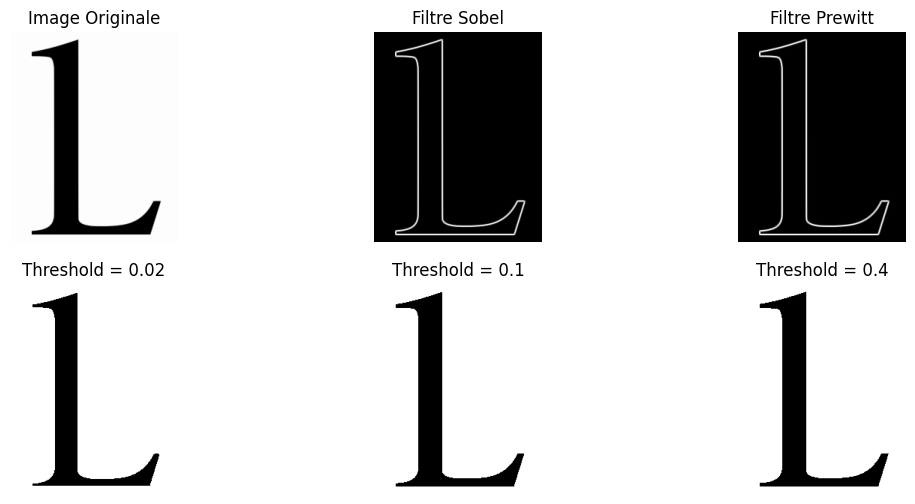

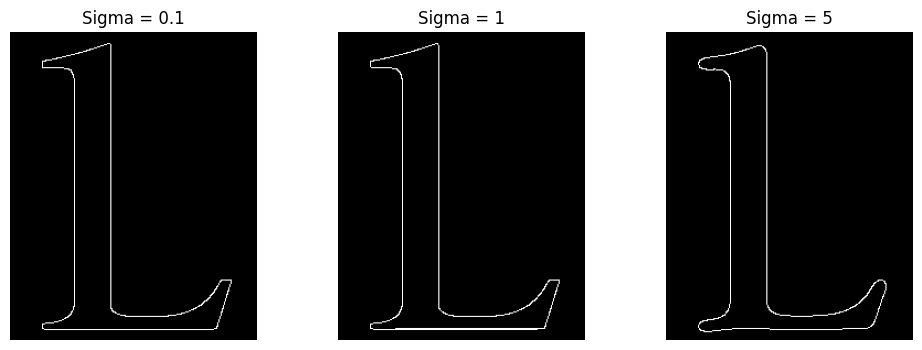

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, feature

# Charger l'image L.png
# Utilisez un lien direct vers le fichier image
image_path = "https://png.pngitem.com/pimgs/s/551-5511973_letter-l-capital-and-small-hd-png-download.png"
image_L = io.imread(image_path)

# Convertir l'image en niveaux de gris si elle est en couleur
if image_L.shape[-1] == 3:
    image_L = color.rgb2gray(image_L)

# 1. Appliquer les filtres Sobel et Prewitt pour détecter les contours
sobel_edges = filters.sobel(image_L)
prewitt_edges = filters.prewitt(image_L)

# Afficher les images résultantes
plt.figure(figsize=(18, 6))

# Image originale
plt.subplot(2, 4, 1)
plt.imshow(image_L, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

# Filtre Sobel
plt.subplot(2, 4, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Filtre Sobel')
plt.axis('off')

# Filtre Prewitt
plt.subplot(2, 4, 3)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Filtre Prewitt')
plt.axis('off')

# 2. Appliquer un seuil pour détecter les contours
thresholds = [0.02, 0.1, 0.4]

for i, threshold in enumerate(thresholds, 1):
    binary_edges = image_L > threshold * image_L.max()

    plt.subplot(2, 4, i + 4)
    plt.imshow(binary_edges, cmap='gray')
    plt.title(f'Threshold = {threshold}')
    plt.axis('off')

plt.show()

# 3. Trouver le seuil optimal
# (Vous devrez ajuster cette partie en fonction des résultats obtenus)
optimal_threshold = ...

# 4. Appliquer le filtre Canny avec différents sigmas
sigma_values = [0.1, 1, 5]
plt.figure(figsize=(12, 4))

for i, sigma in enumerate(sigma_values, 1):
    canny_edges = feature.canny(image_L, sigma=sigma)
    plt.subplot(1, len(sigma_values), i)
    plt.imshow(canny_edges, cmap='gray')
    plt.title(f'Sigma = {sigma}')
    plt.axis('off')

plt.show()

# 5. Comparer les résultats
# (Vous devrez commenter les résultats obtenus)
